## Introduction

The purpose of this project is to explore which features are most important to customer satisfaction. Whether a customer is satisfied or dissatisfied - **a binary classification task**.

The dataset comprises survey responses from 129,880 customers. It includes a range of data points such as class, flight distance, and inflight entertainment. Here, I will use **decision trees**, **random forest** and **XGBoost** to accomplish this goal.

Decision trees require no assumptions regarding the distribution of underlying data and don't require scaling of features. However, they are susceptible to overfitting. To mitigate this risk, I will also leverage the capabilities of random forests as a second model. This approach is designed to reduce variance, bias and overfitting. GBMs is a boosting methodology where each base learner in the sequences is built to predict residual errors of the model that preceded it. It provides high accuracy and robut to outliers, but it can be time consuming due to many hyperparameters. Bad extrapolation is another issue, which means that it may have difficulty in predicting new values that fall outside of the range of values in the training data.

In this project, the following skills will be applied:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a decision tree model, a random forest model and XGBoost
* Tuning hyperparameters using `GridSearchCV`
* Comparing metrics of three models
* Evaluating 3 models through confusion matrix and F1-score
* Select the champion model and apply to the current problem we try to solve

## Step1: Imports

In [1]:
# Import packages

import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [2]:
# Load dataset

df_air = pd.read_csv("/Users/lexicai/Desktop/Python Learning/Project/DA/Airline.csv")

In [3]:
# Show first 5 rows

df_air.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


## Step 2: EDA

This step includes data exploration, data cleaning, and model preparation.

In [4]:
# Display variable names and types

df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [5]:
# Check number of rows and columns

rows, columns = df_air.shape
print(f"Rows: {rows}")
print(f"Columns: {columns}")

Rows: 129880
Columns: 22


In [6]:
# Check missing values

df_air.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [7]:
# Drop missing values

df_air.dropna(inplace=True)

In [8]:
# Confirm all the missing values are dropped

df_air.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

### Check the proportion of the predicted labels (y)
In order to predict customer satisfaction, verify if the dataset is imbalanced.

In [9]:
df_air["satisfaction"].value_counts(normalize=True)

satisfied       0.547406
dissatisfied    0.452594
Name: satisfaction, dtype: float64

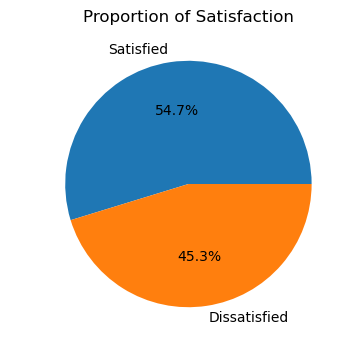

In [10]:
# Pie chart to show proportion of people who want to leave and stay:

satisfied = df_air["satisfaction"].value_counts()
plt.figure(figsize=(6,4))
satisfied.plot(kind="pie", title="Proportion of Satisfaction", labels=["Satisfied", "Dissatisfied"], autopct="%1.1f%%")
plt.ylabel(" ")
plt.show()

The distribution of target value is nearly balanced, which shows it's well-suited for training and evaluating machine learning models.

### Convert data type
Four columns: `satisfaction`, `Customer Type`, `Type of Travel`, `Class` are object. Decision trees need numeric columns, so we need to convert them to numeric.

In [11]:
# Convert "satisfaction" to numeric

df_air["satisfaction"]=df_air["satisfaction"].map({'satisfied':1,'dissatisfied':0})

In [12]:
df_air["satisfaction"]

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction, Length: 129487, dtype: int64

In [13]:
# Convert "Class"

df_air["Class"] = df_air["Class"].map({"Business":3,"Eco Plus":2,"Eco":1})

In [14]:
df_air["Class"]

0         1
1         3
2         1
3         1
4         1
         ..
129875    1
129876    3
129877    1
129878    1
129879    1
Name: Class, Length: 129487, dtype: int64

In [15]:
# Convert other data type

df_air=pd.get_dummies(df_air,
                     columns=["Type of Travel","Customer Type"])

In [16]:
df_air.head()

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Type of Travel_Business travel,Type of Travel_Personal Travel,Customer Type_Loyal Customer,Customer Type_disloyal Customer
0,1,65,1,265,0,0,0,2,2,4,...,3,5,3,2,0,0.0,0,1,1,0
1,1,47,3,2464,0,0,0,3,0,2,...,4,2,3,2,310,305.0,0,1,1,0
2,1,15,1,2138,0,0,0,3,2,0,...,4,4,4,2,0,0.0,0,1,1,0
3,1,60,1,623,0,0,0,3,3,4,...,1,4,1,3,0,0.0,0,1,1,0
4,1,70,1,354,0,0,0,3,4,3,...,2,4,2,5,0,0.0,0,1,1,0


In [17]:
# Check the data type again

df_air.dtypes

satisfaction                           int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Type of Travel_Business travel         uint8
Type of Travel_Personal Travel         uint8
Customer T

### Create the training and testing data
* The first step is to build model to seperate the target value(y) and features(x).
* Put 75% of the data into training set and the remaining 25% into a testing set.

In [18]:
# Target value y:
y = df_air["satisfaction"]

# Features:
X = df_air.drop("satisfaction", axis=1)

In [19]:
# Seperate data into training, validate and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

## Step 3:  Model building (Decision Tree)

### Fit a decision tree classifier model with data

Make a decision tree instance called `decision_tree` and pass in `0` to the `random_state` parameter. This is only so that if other data professionals run this code, they get the same results. Fit the model on the training set by using `fit(X_train,y_train)`, use the `predict()` function on the testing set, and assign those predictions to the variable `dt_pred`. 

In [80]:
# Instantiate the classifier
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model on the training set
decision_tree.fit(X_train, y_train)

# Estimated target value
dt_pred = decision_tree.predict(X_test)

## Step 4: Results and Evaluation

Print out the decision tree model's metrics. Using `metrics.accuracy_score(y_test,dt_pred)` get the accuracy score.
* `y_test`: represent the actual target values;
* `dt_pred`: represent the predicted values made by machine learning model;

In [23]:
print("Metrics for Decision Tree:")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Metrics for Decision Tree:
Accuracy: 0.934913
Precision: 0.941702
Recall: 0.939312
F1 Score: 0.940505


### Evaluation contains following steps:

1. Produce confusion matrix;
2. Plot Feature Importance;
3. Create **tuned decision tree** with optimal hyperparameters;
4. Repeate the first two steps for comparison

### 1. Produce a confusion matrix
Confusion matrix is a table that is used to evaluate the performance of a classification model.
We'd like to know the types of errors made by an algorithm. To obtain this information, we will produce confusion matrix.

In [85]:
# Create helper function to plot confusion matrix

def conf_matrix_plot(model, x_data, y_data):
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=model.classes_)
    disp.plot()
    plt.show()

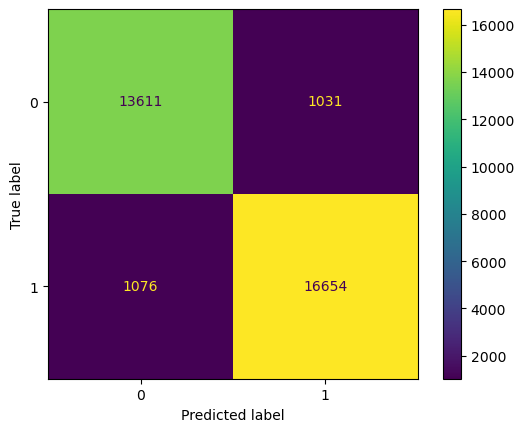

In [86]:
# call function

conf_matrix_plot(decision_tree, X_test, y_test)

In [88]:
# Confusion Matrix

# cm = metrics.confusion_matrix(y_test,dt_pred,labels=decision_tree.classes_)
# disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_)
# disp.plot()

**Patterns**:

In the confusion matrix, there are a high proportion of true positives(16654), customers are satisfied and true negatives(13611), customers are dissatisfied.

### Plot the decision tree
Examine the decision tree. Use `plot_tree` function to produce a visual representation of the tree.

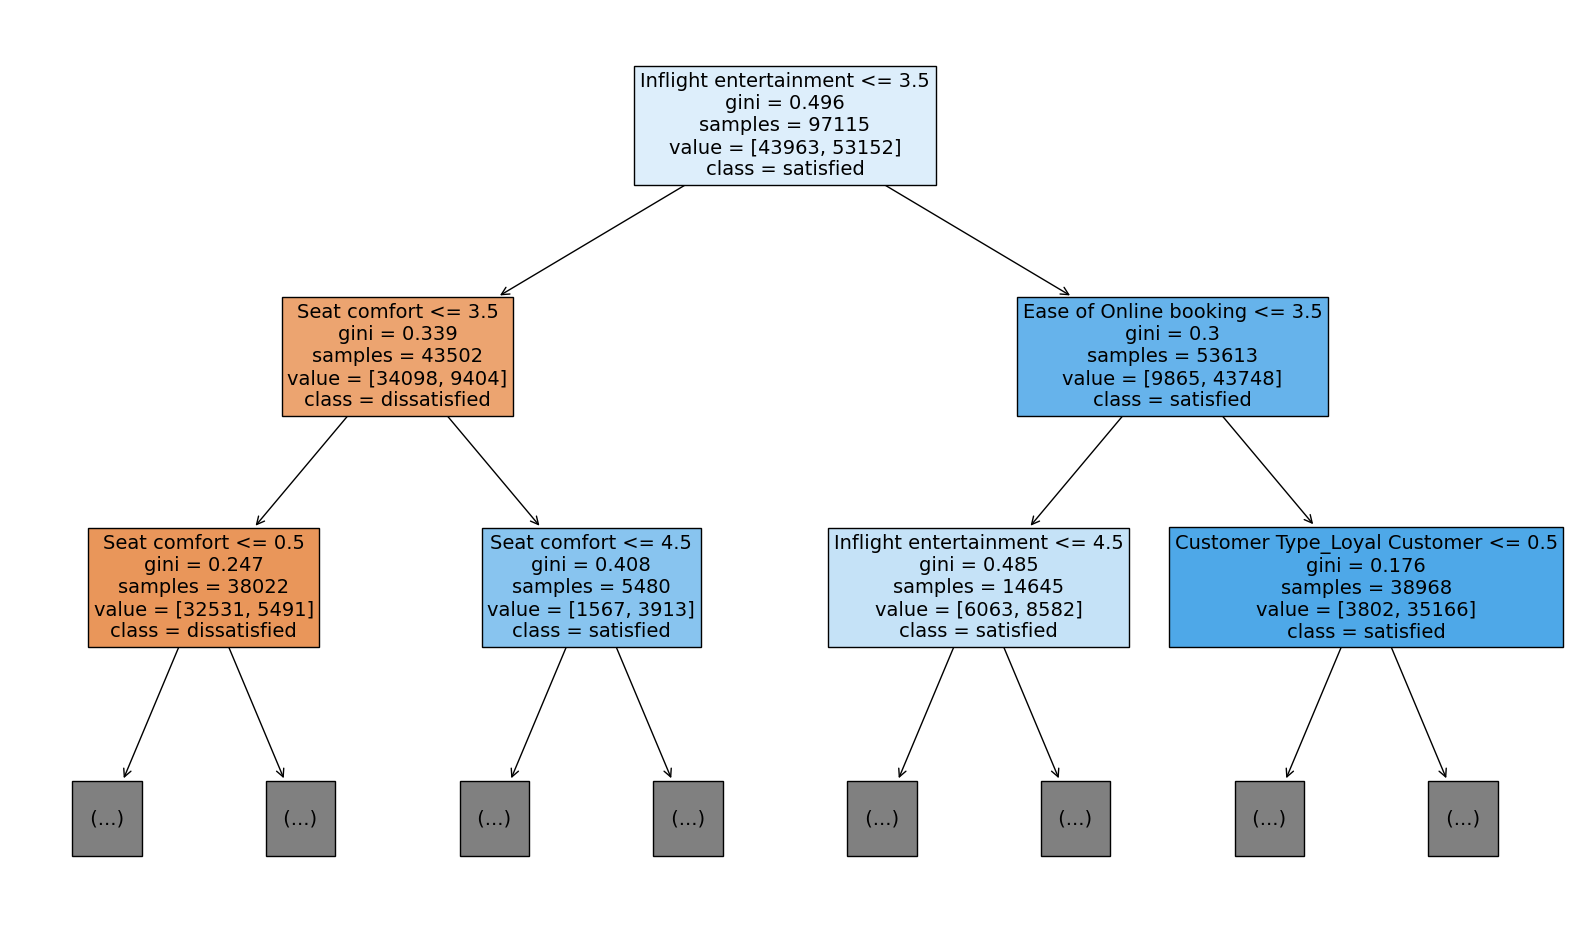

In [25]:
plt.figure(figsize=(20,12))
plot_tree(decision_tree,max_depth=2,fontsize=14,
          feature_names=X.columns,
         class_names={1:"satisfied",0:"dissatisfied"},
                     filled=True)
plt.show()

### 2. Calculate Feature Importance

Using the `feature_importances_` attribute to fetch the relative importances of each feature, then plot the results.

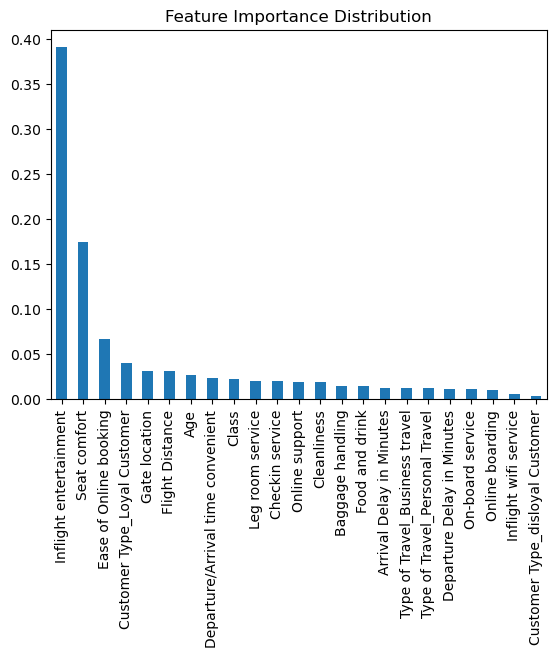

<Figure size 400x400 with 0 Axes>

In [26]:
importance = decision_tree.feature_importances_

forest_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)

fig,ax=plt.subplots()
plt.title("Feature Importance Distribution")
plt.figure(figsize=(4,4))
forest_importance.plot.bar(ax=ax)
plt.show()

The feature importance graph seems to confirm that `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'` are the most important features for this model. 

### Hyperparameter Tuning
This step is followed by building a decision tree, as we need to find the optimal hyperparameters for tuned decision tree.
This technique could help us find the best combination of hyperparameters to achieve the best performance on unseen data.

In [27]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

### Tuned_decision_tree
This will include hyperparameters.

In [30]:
%%time

# Instantiate classifier
tuned_decision_tree = DecisionTreeClassifier(random_state=0)

# Create a GridSearchCV object
clf = GridSearchCV(tuned_decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

# Fit on the training data
clf.fit(X_train, y_train)

CPU times: user 12min 20s, sys: 26 s, total: 12min 46s
Wall time: 12min 53s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1', scoring={'recall', 'f1', 'precision', 'accuracy'})

In [31]:
# Compute the best combination of hyperparameters

clf.best_estimator_

DecisionTreeClassifier(max_depth=18, min_samples_leaf=2, random_state=0)

After running the DecisionTreeClassifier, the maximum depth is 18 and the minimum samples are 2, meaning this is the best combination of hyperparameters.

In [103]:
# Use the optimal hyperparameters

tree_para_opt = {"max_depth":[18],
                "min_samples_leaf":[2]}
clf_opt = GridSearchCV(tuned_decision_tree, 
                   tree_para_opt, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

In [106]:
%%time

clf_opt.fit(X_train,y_train)

CPU times: user 4.49 s, sys: 299 ms, total: 4.79 s
Wall time: 5.09 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [18], 'min_samples_leaf': [2]},
             refit='f1', scoring={'recall', 'f1', 'precision', 'accuracy'})

### Metrics of  tuned decision tree on test data:

In [140]:
# Use the optimal model on test dataset

clf_opt_pre = clf_opt.predict(X_test)

print('F1 score tuned random forest: ','%.5f'% f1_score(y_test, clf_opt_pre))
print('Recall score tuned random forest: ','%.5f'% recall_score(y_test, clf_opt_pre))
print('Precision score tuned random forest: ','%.5f'% precision_score(y_test, clf_opt_pre))
print('Accuracy score tuned random forest: ','%.5f'% accuracy_score(y_test, clf_opt_pre))

F1 score tuned random forest:  0.94266
Recall score tuned random forest:  0.93187
Precision score tuned random forest:  0.95371
Accuracy score tuned random forest:  0.93791


### Determine the 'best' decision tree model's metrics

In [137]:
# results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])

def make_results(model_name, model_object):
    """
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    """

    # Get all the results from the CV and put them in a df.
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score).
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row.
    f1 = best_estimator_results['mean_test_f1']
    recall = best_estimator_results['mean_test_recall']
    precision = best_estimator_results['mean_test_precision']
    accuracy = best_estimator_results['mean_test_accuracy']

    # Create a table of results.
    data = {'Model': model_name,
                          'F1': f1,
                          'Recall': recall,
                          'Precision': precision,
                          'Accuracy': accuracy}
    table = pd.DataFrame(data, index=[0])
                         

    return table

result_table = make_results("Tuned Decision Tree", clf_opt)

result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945205,0.935656,0.954972,0.940627


In [120]:
dr_result = pd.DataFrame({"Model":"Decision Tree",
                         "F1":0.940505,
                         "Recall":0.939312,
                         "Precision":0.941702,
                         "Accuracy":0.934914},index=[1])
dr_result

,Model,F1,Recall,Precision,Accuracy
1,Decision Tree,0.940505,0.939312,0.941702,0.934914


In [124]:
tree = pd.concat([dr_result,result_table],ignore_index=True)
tree

,Model,F1,Recall,Precision,Accuracy
0,Decision Tree,0.940505,0.939312,0.941702,0.934914
1,Tuned Decision Tree,0.945205,0.935656,0.954972,0.940627


The F1 score for the decision tree that was not hyperparameter tuned is 0.940505 and the F1 score for the hyperparameter-tuned decision tree is 0.945205. While ensuring that overfitting doesn't occur is necessary for some models, it didn't make a meaningful difference in improving this model. 

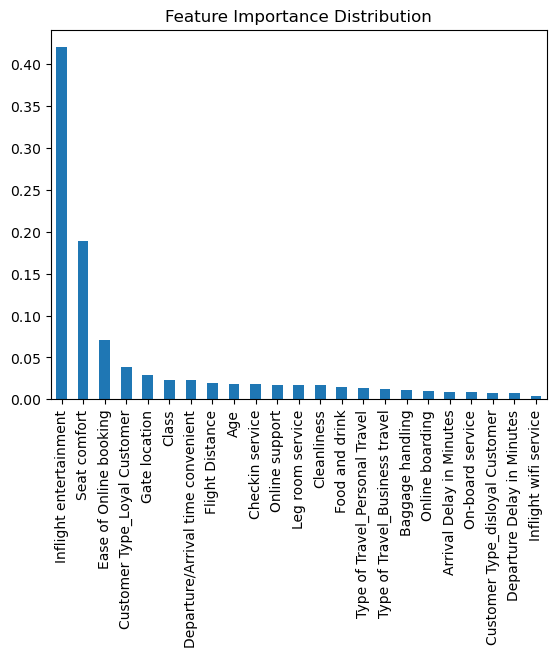

<Figure size 400x400 with 0 Axes>

In [141]:
# Use the tuned_decesion_tree to extract feature_importances

importance = clf_opt.best_estimator_.feature_importances_

f_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)

fig,ax=plt.subplots()
plt.title("Feature Importance Distribution")
plt.figure(figsize=(4,4))
f_importance.plot.bar(ax=ax)
plt.show()

### Considerations

- **Accuracy**: tends to be the metric that the stakeholders can best understand.

- **Precision**: measures what proportion of *predicted positives* is truly positive. For example, if you don't want to falsely claim a customer is satisfied, precision would be a good metric. Assuming a customer is happy when they are really not might lead to customer churn. In this case, 95.50% of customers are predicted to be satisfied. 

- **Recall**: measures the percentage of *actual positives* a model correctly identified (true positive). For this dataset, the airline might want to limit false negatives (actually satisfied people who are predicted to be unsatisfied). Assuming a customer is unhappy when the customer is happy can lead to the airline wasting resources trying to improve the customer experience of an already happy customer. In this case, 93.57% of customers are actually satisfied.

- **F1**: balances precision and recall. It is the harmonic mean of precision and recall, or their product divided by their sum.

### Findings:

*  Customer satisfaction is highly tied to `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'`. The findings of tuned decision tree is the same as the ones we got from decision tree. Improving these experiences should lead to better customer satisfaction. 
*  The success of the model suggests that the airline should invest more effort into model building and model understanding since this model seemed to be very good at predicting customer satisfaction. 

## Step 3: Model Building (Random Forest)

In [35]:
# Seperate data into training, validate and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

X_tr, X_val, y_tr, y_val = train_test_split(X_train,y_train,test_size=0.25, random_state=0)

In [36]:
# Instantiate the classifier

rf = RandomForestClassifier(random_state=0)

### Tune the model

Fit and tune a random forest model with seperate validation set. Create a dictionary of hyperparameters to seach over.
* `max_depth`:Specifies how many levels your tree can have.
* `min_samples_leaf`:Controls how many samples in dataset.
* `min_samples_split`:Controls threshold below which nodes become leaves. When it's folat, it represents the fraction of samples. If we set 0.01, and sample size is 1000, it means that it won't split if it has less than 10 samples.
* `max_features`:Specify the number of features that each tree randomly. selects during training.
* `n_estimators`:Specify number of trees your model will build.
* `max_samples`: Specify number of samples bootstrapped from the dataset to train each base model. When it's float, it represents the fractions of the total training samples. Eg. 1000 training samples with `max_samples` set to 0.5, means that each base estimator will be fitted on a random subset of 50% of the training data.

In [37]:
# Determine set of hyperparameters

cv_params = {'max_depth':[10,50],
            'min_samples_leaf':[0.5,1],
            'min_samples_split':[0.001,0.01],
            'max_features':["sqrt"],
            'n_estimators':[50,100],
            'max_samples':[0.5,0.9]}

# 'sqrt': introduce randomness and diversity into decision tree or random forest

In [38]:
# Create a set of scoring metrics

scoring = {'accuracy','precision','recall','f1'}

In [39]:
# Create a validation split

split_index = [0 if x in X_val.index else -1 for x in X_train.index]

custom_split = PredefinedSplit(split_index)

# Create a GridSearchCV object

rf_val = GridSearchCV(rf,cv_params,scoring=scoring, 
                     cv=custom_split,refit='f1',
                    n_jobs = -1, verbose = 1)

In [40]:
%%time

# Fit the model

rf_val.fit(X_train,y_train)

Fitting 1 folds for each of 32 candidates, totalling 32 fits
CPU times: user 10.3 s, sys: 549 ms, total: 10.9 s
Wall time: 40 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', scoring={'recall', 'f1', 'precision', 'accuracy'},
             verbose=1)

It's much more efficient than the Tuned Decision tree. The previous model runs for 13 minutes, but random forest only runs for 40 seconds!

In [41]:
# Obtain the optimal parameters

rf_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 100}

In [42]:
# Check the mean cross-validated acuuracy

rf_val.best_score_

0.949088001218537

## Step 4: Results and Evaluation
Use the selected model to predict on your test data. Use the optimal parameters found via GridSearchCV.

### Tuned_random_forest

In [43]:
# Use optimal parameters on GridSearchCV

rf_opt = RandomForestClassifier(n_estimators = 100, max_depth = 50, 
                                min_samples_leaf = 1, min_samples_split = 0.001,
                                max_features="sqrt", max_samples = 0.9, random_state = 0)

In [44]:
%%time

# Fit the optimal model

rf_opt.fit(X_train, y_train)

CPU times: user 9.85 s, sys: 100 ms, total: 9.95 s
Wall time: 10 s


RandomForestClassifier(max_depth=50, max_features='sqrt', max_samples=0.9,
                       min_samples_split=0.001, random_state=0)

By applying the optimal parameters, it runs even faster, only taking 10 seconds.

In [45]:
# Predict on the test set using the optimal model

y_pred = rf_opt.predict(X_test)

In [46]:
# Get metrics of Random forest

pc_test = precision_score(y_test, y_pred, pos_label = 1)
# specify which class label should be considered as positive class

rc_test = recall_score(y_test, y_pred, pos_label = 1)
ac_test = accuracy_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred, pos_label = 1)

print("The precision score is {pc:.3f}".format(pc = pc_test))
print("The recall score is {rc:.3f}".format(rc = rc_test))
print("The accuracy score is {ac:.3f}".format(ac = ac_test))
print("The F1 score is {f1:.3f}".format(f1 = f1_test))

The precision score is 0.952
The recall score is 0.946
The accuracy score is 0.944
The F1 score is 0.949


### Produce Confusion Matrix

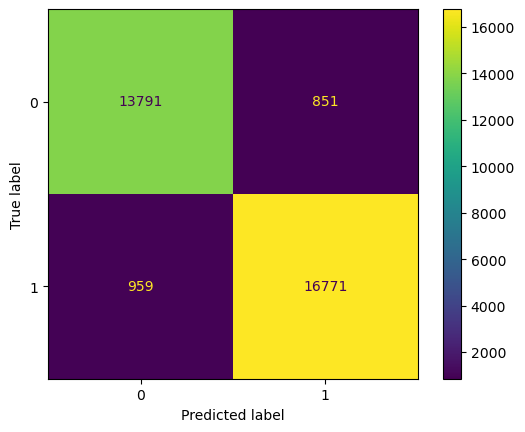

In [89]:
conf_matrix_plot(rf_opt,X_test,y_test)

There are 16771 True Positives, which means there are 16771 customers satisfied and 13791 True Negatives, dissatisfied customers.

### Compare the two models
Combine the Decision tree and Random forest

In [47]:
rf_table = pd.DataFrame({
    'Model': ["Tuned Random Forest"],  
    'F1': f1_test,
    'Recall': rc_test,
    'Precision': pc_test,
    'Accuracy': ac_test
},index=[1])

rf_table

,Model,F1,Recall,Precision,Accuracy
1,Tuned Random Forest,0.948801,0.945911,0.951708,0.944087


In [131]:
pd.concat([tree,rf_table], ignore_index=True).sort_values(by='F1', ascending=False)

,Model,F1,Recall,Precision,Accuracy
2,Tuned Random Forest,0.948801,0.945911,0.951708,0.944087
1,Tuned Decision Tree,0.945205,0.935656,0.954972,0.940627
0,Decision Tree,0.940505,0.939312,0.941702,0.934914


### Comparison
The tuned random forest has higher scores overall, so it is the better model. Particularly, it shows better F1-score, which indicates that the random forest model may do better at classification when taking into account false positives and false negatives.

Except considering the metrics, the runtime of random forest is much less than the tuned decision tree.

### Plot feature_importance

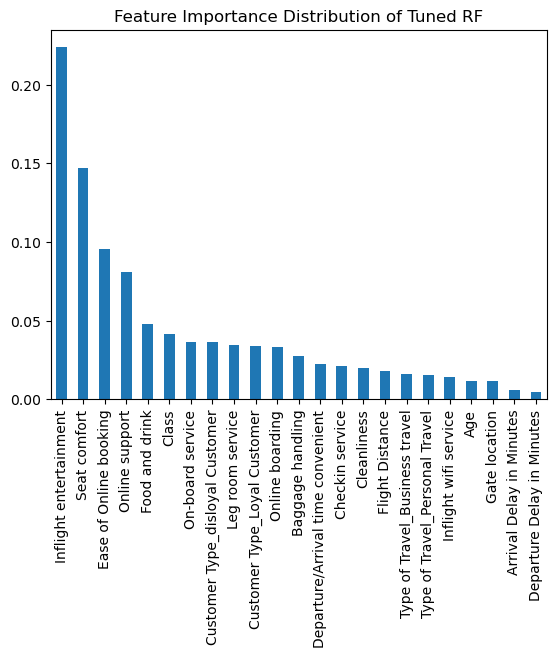

<Figure size 400x400 with 0 Axes>

In [143]:
feature_importance = rf_opt.feature_importances_
f_importance_plot = pd.Series(feature_importance, index=X.columns).sort_values(ascending=False)

fig,ax=plt.subplots()
plt.title("Feature Importance Distribution of Tuned RF")
plt.figure(figsize=(4,4))
f_importance_plot.plot.bar(ax=ax)
plt.show()

### Considerations

* Precision tends to stop predicting customers who are satisfied unless there is a high certainty that customers will be satisfied, which will lead to high rate of false negatives.
* Recall tends to predict customers who are satisfied even there is a small chance that they will be satisfied, which will lead to high rate of false positives.
* F1 score is usually more useful than accuracy scores. If the cost of false positives and false negatives are very different, it's better to use the F1 score and combine the information from precision and recall.

When considering those metrics, it's essential to consider the potential associated costs. For example, in the case of **precision**, the cost could include the resources needed to convince customers to saty with the airline, even if they would have remained without any incentives. Conversely, if we prioritise **recall**, the cost may involve losing  dissatisfied customers who could have been retained with appropriate incentives, but were not.

## Step 3: Model Building (XGBoost)

In [53]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 4.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [54]:
# Import all the necessary libraries for XGBoost

# This is the classifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance

In [55]:
# Seperate data into training and test

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [132]:
# Instantiate a classifier

xgb = XGBClassifier(objective='binary:logistic',random_state=0)
# the model will use logistic regression to estimate probabilities for the binary classfication

**Heperparameters:**
* ` min_child_weight`:It controls how the tree nodes are split.
* `learning_rate`:How much weight is given to each consecutive tree's prediction in the final ensemble. A smaller value makes the optimization more robus but slower.
* `subsample`: The fraction of samples used for training each tree. 
* `colsample_bytree`:It controls the fraction of features(columns)used for training each tree.

In [58]:
# Determine a set of hyperparameters

cv_params = {'max_depth': [4,5,6],
              'min_child_weight': [2,3,4,5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15,20],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

In [59]:
# Define 'scoring'

scoring={'accuracy','precision','recall','f1'}

In [60]:
# Construct GridSearch with cross-validation

xgb_cv = GridSearchCV(xgb,cv_params,scoring=scoring,cv=5,refit='f1')

In [61]:
%%time

# fit the GridSearchCV model to training data

xgb_cv = xgb_cv.fit(X_train,y_train)

CPU times: user 20min 43s, sys: 1min 17s, total: 22min
Wall time: 3min 30s


In [65]:
# Check best parameters

xgb_cv_opt = xgb_cv.best_params_
xgb_cv_opt

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 20,
 'subsample': 0.7}

In [67]:
# Use optimal parameters on GridSearchCV

xgb_opt = GridSearchCV(xgb,{'colsample_bytree':[0.7],
 'learning_rate':[0.3],
 'max_depth':[6],
 'min_child_weight':[3],
 'n_estimators':[20],
 'subsample':[0.7]},scoring=scoring,cv=5,refit='f1')

## Step 4 Results and Evaluation

In [68]:
%%time

# Refit the model

xgb_opt = xgb_cv.fit(X_train,y_train)

CPU times: user 23min 6s, sys: 1min 33s, total: 24min 39s
Wall time: 3min 50s


In [98]:
# Predict on the test set using the optimal model

xgb_pred = xgb_opt.predict(X_test)
xgb_pred

array([0, 1, 0, ..., 1, 1, 0])

In [91]:
xgb_cv_results = make_results('XGBoost CV',xgb_opt)
xgb_cv_results

,Model,F1,Recall,Precision,Accuracy
0,XGBoost CV,0.941094,0.935844,0.946406,0.93588


##  Model Selection and Final Results

* Compare metrics of 3 models;
* Predict on the test data.

In [77]:
pd.concat([result_table,rf_table,xgb_cv_results]).sort_values(by='F1',ascending=False, ignore_index=True)

,Model,F1,Recall,Precision,Accuracy
0,Tuned Random Forest,0.948801,0.945911,0.951708,0.944087
1,Tuned Decision Tree,0.945205,0.935656,0.954972,0.940627
2,XGBoost CV,0.941094,0.935844,0.946406,0.935880


### Produce Confusion Matrix

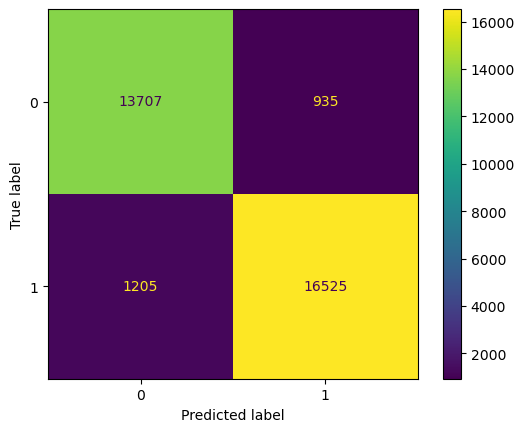

In [92]:
conf_matrix_plot(xgb_opt,X_test,y_test)

In [93]:
len(y_test)

32372

From the 32,372 people in our test data, there are (13707+935)customers who are dissatisfied. Of those, our model captures 13707 dissatisfied customers. The confusion matrix indicates that, when the model makes an error, it's usually Type II error - it gives False Negatives by predicting satisfied customers as dissatisfied. On the other hand, it makes less Type I error - it gives False Positives - dissatisfied customers are predicted as satisfied customers.

Again, whether these results are acceptable depends on the costs of measures taken to keep customers happy. For example, if airline does nothing about dissatisfied customers, it may lose 14642 customers. On the other hand, if airline tries to use incentives to keep those dissatisfied customers, it will risk losing money on those who already satisfied.

### Feature Importance

The XGBoost library has a function called `plot_importance`, which we imported at the beginning of this notebook. This let's us check the features selected by the model as the most predictive. We can create a plot by calling this function and passing to it the best estimator from our grid search.

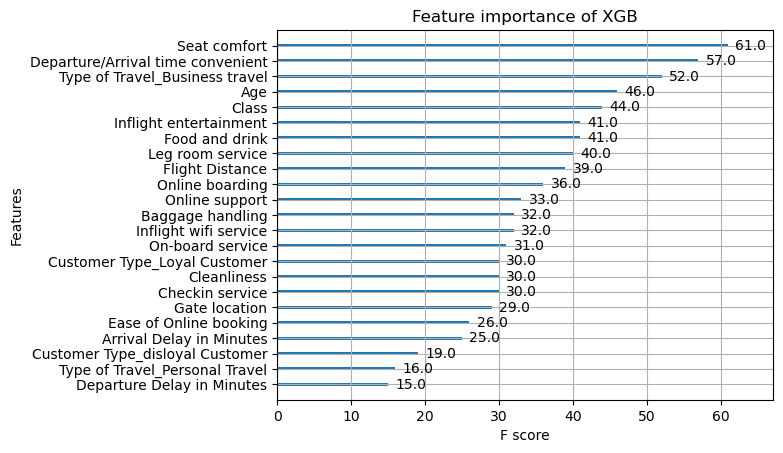

In [145]:
plot_importance(xgb_cv.best_estimator_)
plt.title("Feature importance of XGB")
plt.show()

This tells us that the four most important features are `seat comfort`, `Departure/Arrival time convenient`,`Travel_Business Type`, and `Age`.

### Champion Model

The decision to use only the champion model to predict on the test data comes with a trade-off. The benefit is that we get a true idea of how we'd expect the model to perform on new, unseen data. The cost of this decision is that, by using the validation scores to both tune hyperparameters and select the champion model, we run the risk of selecting the model that most overfit the validation data.

Alternatively, we could have selected our champion model by using all of our tuned models to predict on the test data and choosing the one that performed best. That also would have come with a trade-off. There wouldn't be as much risk of overfitting to the validation data, but by using the test data to select our champion model, we wouldn't get a truly objective idea of how the model would perform on new, unseen data. We would need a new dataset for that, which means we would have had to set more data aside at the beginning, resulting in less data to use to train the model. 

With sufficient data, a more rigorous approach would be:

1. Split the data into training, validation, and test sets
2. Tune hyperparameters using cross-validation on the training set
3. Use _all_ tuned models to predict on the validation set
4. Select a champion model based on performance on the validation set
5. Use champion model alone to predict on test data

In this case, the champion model we pick would be **tuned random forest** given that the best metrics and efficient runtime of this model. The key areas to improve customers' satisfaction would include: `inflight entertainment`,`seat comfort` and `online booking`. The airline company could spend more time reseach how to improve those areas.